## Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

## Objective

* Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Product Portfolio

* The KP281 is an entry-level treadmill that sells for USD 1,500.

* The KP481 is for mid-level runners that sell for USD 1,750.

* The KP781 treadmill is having advanced features that sell for USD 2,500.

## Dataset Characteristics
* Product: Product Purchased KP281, KP481, or KP781
* Age: In years
* Gender: Male/Female
* Education: in years
*  MaritalStatus: Single or Partnered
* Usage: average number of times the customer plans to use the treadmill each week
* Fitness: self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the excellent shape.
* Income: annual income (in $)
* Miles: average number of miles the customer expects to walk/run each week

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
#checking data
df.head(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [4]:
df.shape

(180, 9)

### Shape of data :
* The dataset contains 180 rows and 9 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Columns data types:
* Product, Gender and MaritalStatus are object(string)
* Age, Education, Usage, Fitness, Income and Miles are in int64(integer)

### Checking descriptive characteristics:

In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### 🔍 Insights:

* Age: Customers are between 18 and 50 years old, with an average age of 29 years.
* Education: The duration of customers' education ranges from 12 to 21 years, with an average of 16 years.
* Usage: Customers plan to use the product between 2 and 7 times per week, averaging 3 times per week.
* Fitness: On a 5-point scale, customers rate their fitness level at an average of 3, indicating a moderate level of fitness.
* Income: Customers have an annual income ranging from USD 30,000 to USD 100,000, with an average income of about USD 54,000.
* Miles: Customers aim to run between 21 and 360 miles per week, with an average target of 103 miles per week.

In [7]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


### Checking Missing Values

In [8]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* ####  There are no missing values in the dataset.

### ➕ Adding new columns for better analysis

#### Age Column
Categorizing the values in the age column into 4 different buckets:
* Young Adult: 18 - 25
* Adult: 26 - 35
* Middle-Aged Adult: 36 - 45
* Elder: 46 and above

#### Education Column
Categorizing the values in the education column into 3 different buckets:
* Primary Education: Up to 12 years
* Secondary Education: 13 to 15 years
* Higher Education: 16 years and above

#### Income Column
Categorizing the values in the income column into 4 different buckets:
* Low Income: Up to USD 40,000
* Moderate Income: USD 40,000 to USD 60,000
* High Income: USD 60,000 to USD 80,000
* Very High Income: Above USD 80,000
    
#### Miles Column
Categorizing the values in the miles column into 4 different buckets:
* Light Activity: Up to 50 miles
* Moderate Activity: 51 to 100 miles
* Active Lifestyle: 101 to 200 miles
* Fitness Enthusiast: Above 200 miles

In [9]:
#binning the age values into categories
age_bin = [17,25,35,45,float('inf')]
age_labels = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['Age_group'] = pd.cut(df['Age'],bins = age_bin,labels = age_labels)

#binning the education values into categories
education_bin= [0,12,15,float('inf')]
education_labels = ['Primary Education', 'Secondary Education', 'Higher Education']

df['Education_group'] = pd.cut(df['Education'],bins = education_bin,labels = education_labels)

#binning the income values into categories
income_bin = [0,40000,60000,80000,float('inf')]
income_labels = ['Low Income','Moderate Income','High Income','Very High Income']

df['Income_group'] = pd.cut(df['Income'],bins = income_bin,labels = income_labels)

#binning the miles values into categories
miles_bin = [0,50,100,200,float('inf')]
miles_labels = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['Miles_group'] = pd.cut(df['Miles'],bins = miles_bin,labels = miles_labels)

In [10]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_group,Income_group,Miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


### Outliers

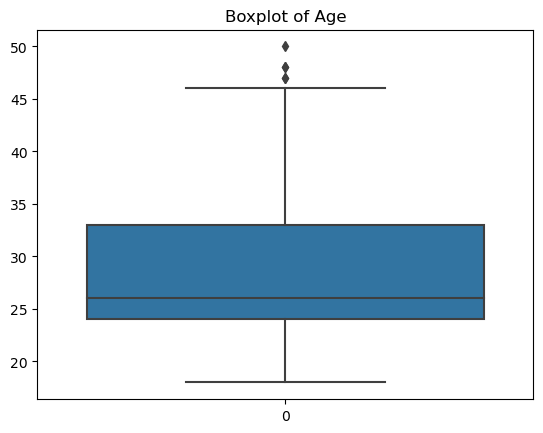

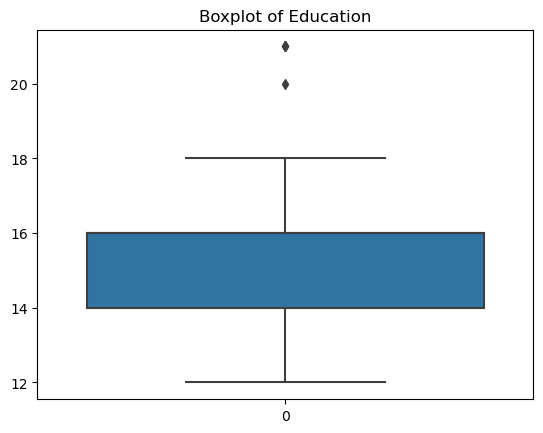

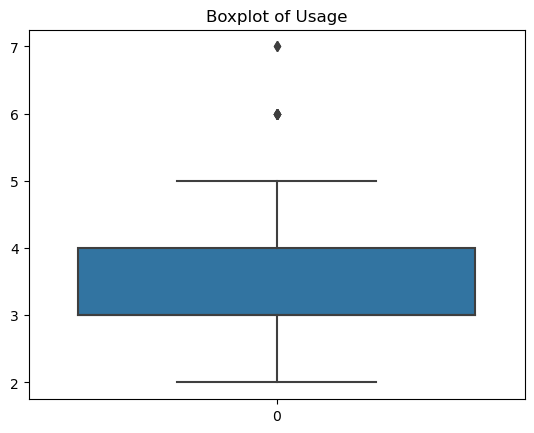

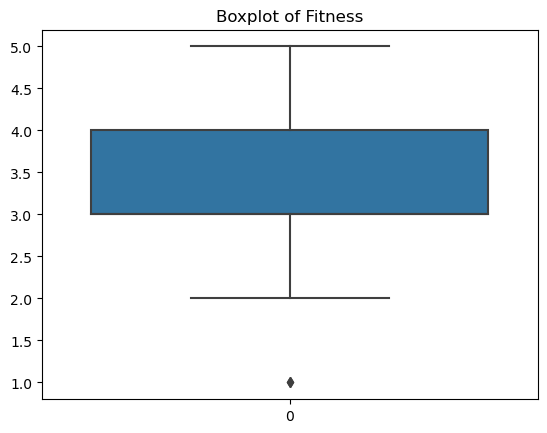

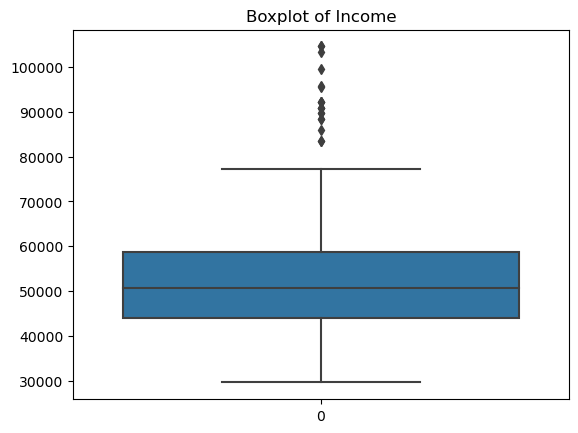

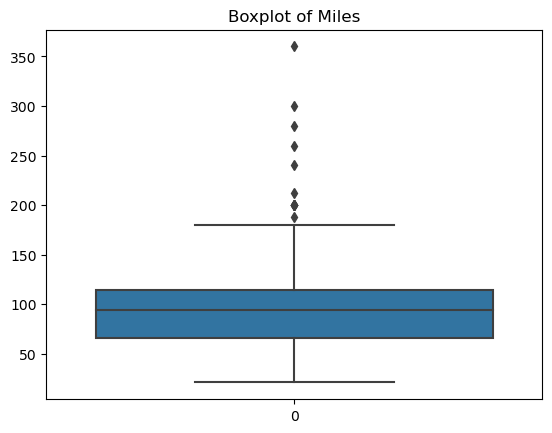

In [11]:
columns = ['Age','Education','Usage','Fitness','Income','Miles']
for column in columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data = df[column])
    plt.title(f'Boxplot of {column}')

### Remove/clip the data between the 5 percentile and 95 percentile

In [12]:
df_clip = df.copy()

for col in columns:
    lower_bound = np.percentile(df[col], 5)
    upper_bound = np.percentile(df[col], 95)
    df_clip[col] = np.clip(df_clip[col], lower_bound, upper_bound)

In [13]:
df_clip.shape

(180, 13)

### Non-Graphical Analysis: Value counts and unique attributes ​​

### Product Column

In [14]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [15]:
df['Product'].nunique()

3

In [16]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [17]:
product_count = df['Product'].value_counts(normalize = True)*100
product_count.round(2)

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

### Age

In [18]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [19]:
df['Age'].max()

50

In [20]:
df['Age'].nunique()

32

In [21]:
age_count = df['Age'].value_counts(normalize = True)*100
age_count.round(2)

25    13.89
23    10.00
24     6.67
26     6.67
28     5.00
35     4.44
33     4.44
30     3.89
38     3.89
21     3.89
22     3.89
27     3.89
31     3.33
34     3.33
29     3.33
20     2.78
40     2.78
32     2.22
19     2.22
48     1.11
37     1.11
45     1.11
47     1.11
46     0.56
50     0.56
18     0.56
44     0.56
43     0.56
41     0.56
39     0.56
36     0.56
42     0.56
Name: Age, dtype: float64

In [22]:
df['Age_group'].value_counts()

Young Adults          79
Adults                73
Middle Aged Adults    22
Elder                  6
Name: Age_group, dtype: int64

#### Gender

In [23]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['Gender'].nunique()

2

In [25]:
gender_count = df['Gender'].value_counts(normalize = True)*100
gender_count.round(2)

Male      57.78
Female    42.22
Name: Gender, dtype: float64

In [26]:
df.columns 

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age_group', 'Education_group',
       'Income_group', 'Miles_group'],
      dtype='object')

### Education 

In [27]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [28]:
df['Education'].nunique()

8

In [29]:
education_count = df['Education'].value_counts(normalize = True)*100
education_count.round(2)         

16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: Education, dtype: float64

In [30]:
df['Education_group'].value_counts()

Higher Education       112
Secondary Education     65
Primary Education        3
Name: Education_group, dtype: int64

### MaritalStatus

In [31]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [32]:
df['MaritalStatus'].nunique()

2

In [33]:
martialstatus_count = df['MaritalStatus'].value_counts(normalize = True)*100
martialstatus_count.round(2)

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

### Usage

In [34]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [35]:
df['Usage'].nunique()

6

In [36]:
usage_counts = df['Usage'].value_counts(normalize = True)
usage_counts.round(2)

3    0.38
4    0.29
2    0.18
5    0.09
6    0.04
7    0.01
Name: Usage, dtype: float64

### Fitness

In [37]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [38]:
df['Fitness'].nunique()

5

In [39]:
fitness_level_score_counts = df['Fitness'].value_counts(normalize = True)
fitness_level_score_counts.round(2)

3    0.54
5    0.17
2    0.14
4    0.13
1    0.01
Name: Fitness, dtype: float64

### Income

In [40]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [41]:
df['Income'].nunique()

62

In [42]:
df['Income_group'].value_counts()

Moderate Income     106
Low Income           32
High Income          23
Very High Income     19
Name: Income_group, dtype: int64

### Miles

In [43]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [44]:
df['Miles'].nunique()

37

In [45]:
df['Miles_group'].value_counts()

Moderate Activity      97
Active Lifestyle       60
Light Activity         17
Fitness Enthusiast      6
Name: Miles_group, dtype: int64

### Graphical Analysis

### Univariate Analysis

#### Categorical Columns

In [46]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age_group', 'Education_group',
       'Income_group', 'Miles_group'],
      dtype='object')

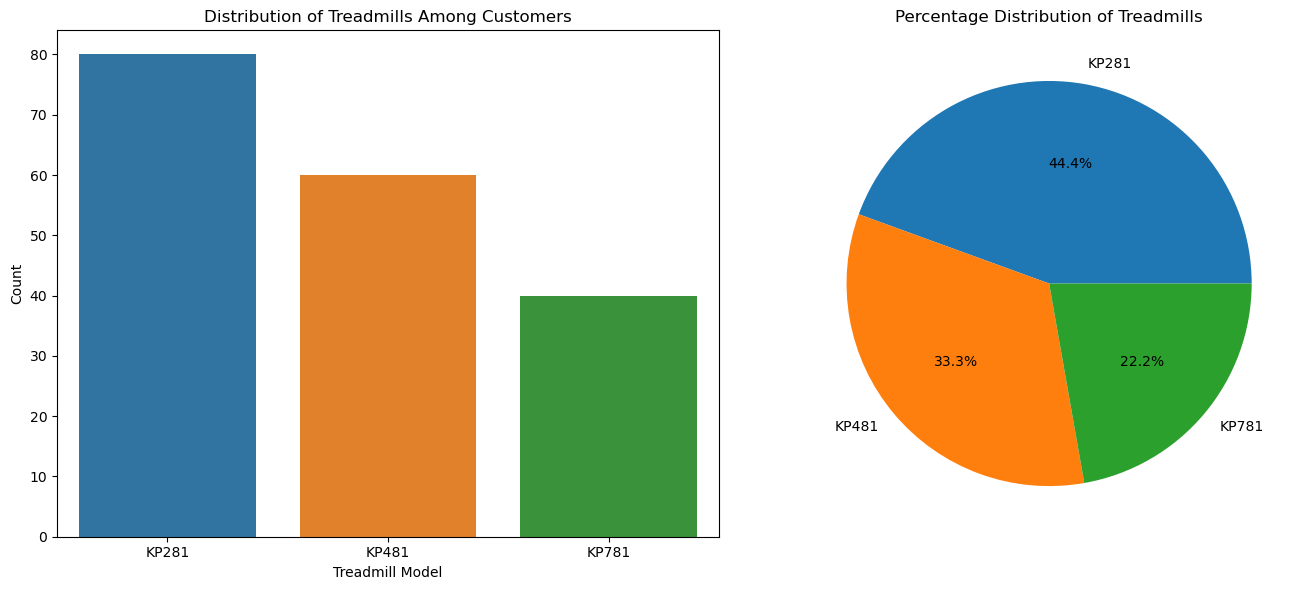

In [47]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for distribution of treadmills
plt.subplot(1, 2, 1)
sns.countplot(x="Product", data=df)
plt.title("Distribution of Treadmills Among Customers")
plt.xlabel("Treadmill Model")
plt.ylabel("Count")

# Subplot 2: Pie chart for percentage distribution
plt.subplot(1, 2, 2)
product_counts = df["Product"].value_counts(normalize=True)
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Treadmills")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Insights:

Based on the distribution of product purchases and their pricing:

1. KP281 (44.44% of customers, USD 1,500):

* Popularity: Most popular due to affordability and essential features.
* Target Audience: Entry-level users and budget-conscious customers.
* Strategy: Focus on maintaining this lead with broad marketing campaigns emphasizing value for money.

2. KP481 (33.33% of customers, USD 1,750):

* Popularity: Significant market share as a mid-range option.
* Target Audience: Mid-level runners seeking a balance of cost and advanced features.
* Strategy: Highlight superior features and performance benefits over the KP281 to attract more customers.

3. KP781 (22.22% of customers, USD 2,500):

* Popularity: Least popular due to higher price.
* Target Audience: Advanced users and those seeking premium features.
* Strategy: Target niche markets with focused marketing on advanced features and specialized use cases, showcasing its premium value.

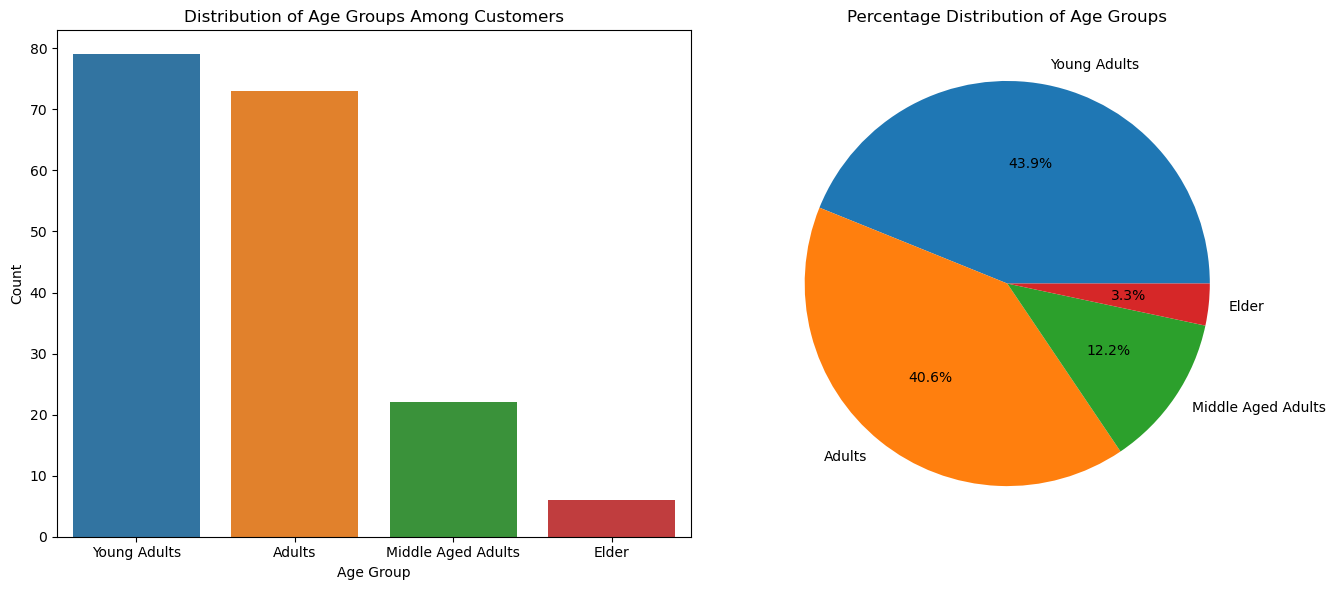

In [48]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for distribution of age groups
plt.subplot(1, 2, 1)
sns.countplot(x="Age_group", data=df)
plt.title("Distribution of Age Groups Among Customers")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Subplot 2: Pie chart for percentage distribution of age groups
plt.subplot(1, 2, 2)
agegroup_counts = df["Age_group"].value_counts(normalize=True)
plt.pie(agegroup_counts, labels=agegroup_counts.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Age Groups")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the provided age group distribution among customers:

* Young Adults (18-25): 43.89% of the customers fall into this category.
* Adults (26-35): 40.56% of the customers fall into this category.
* Middle-Aged Adults (36-45): 12.22% of the customers fall into this category.
* Elders (46 and above): 3.33% of the customers fall into this category.
    
Insights:

1. Young Adults (18-25):

* Popularity: This age group represents the largest segment of customers.
* Target Audience: Likely to be more active and looking for affordable fitness solutions.
* Strategy: Focus on marketing campaigns that highlight the affordability and essential features of the KP281 to appeal to young adults. Utilize social media and influencer marketing to reach this demographic.

2. Adults (26-35):

* Popularity: The second largest segment, nearly as significant as the young adults.
* Target Audience: Likely to have more disposable income and interested in maintaining or improving fitness levels.
* Strategy: Highlight the advanced features and durability of the KP481 to attract adults who are willing to spend a bit more for better quality and performance. Emphasize the benefits of staying fit for work-life balance and overall health.

    
3. Middle-Aged Adults (36-45):

* Popularity: A smaller but notable segment of the market.
* Target Audience: Likely to be more health-conscious and seeking high-quality, reliable fitness equipment.
* Strategy: Emphasize the advanced features and health benefits of the KP781. Highlight customer testimonials and endorsements from health professionals to build trust and appeal to middle-aged adults.

4. Elders (46 and above):

* Popularity: The smallest segment of the market.
* Target Audience: Likely to focus on low-impact exercise and may have specific health considerations.
* Strategy: While this is a smaller segment, tailored marketing could emphasize the safety and ease of use of the KP281 or KP481. Consider partnerships with health organizations and targeted advertising in health-focused media.

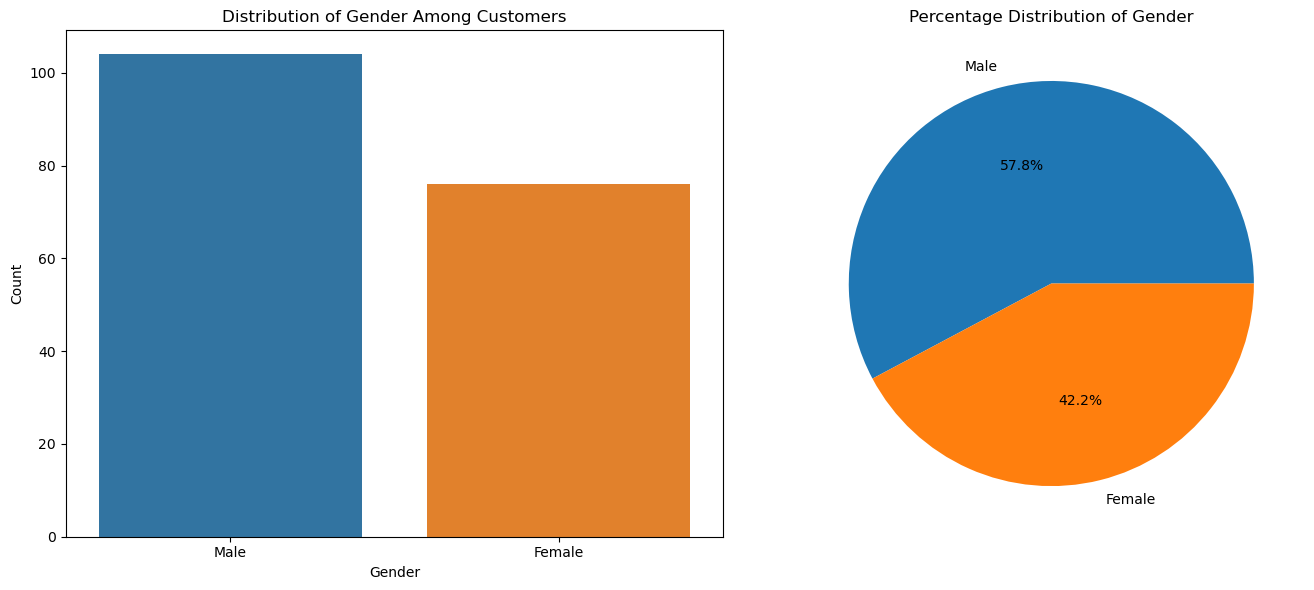

In [49]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for distribution of gender
plt.subplot(1, 2, 1)
sns.countplot(x="Gender", data=df)
plt.title("Distribution of Gender Among Customers")
plt.xlabel("Gender")
plt.ylabel("Count")

# Subplot 2: Pie chart for percentage distribution of gender
plt.subplot(1, 2, 2)
gender_counts = df["Gender"].value_counts(normalize=True)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Gender")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the provided gender distribution among customers:

1. Male: 57.78% of the customers are male.
2. Female: 42.22% of the customers are female.

Insights:

1. Male Customers:

* Popularity: The majority of the customers are male, making up nearly 58% of the total customer base.
* Target Audience: Likely interested in fitness equipment that offers durability, advanced features, and performance enhancements.
* Strategy: Marketing campaigns could focus on the performance and durability aspects of the treadmills, particularly the KP481 and KP781 models. Highlighting features such as advanced tracking metrics, high-speed capabilities, and robust construction could appeal to male customers. Additionally, leveraging sports-related endorsements and fitness influencers who are male can further attract this demographic.

2. Female Customers:

* Popularity: Female customers represent a significant portion of the market, accounting for over 42%.
* Target Audience: Likely interested in fitness equipment that offers a balance of functionality, ease of use, and health benefits.
* Strategy: Marketing campaigns for female customers could focus on the health benefits, ease of use, and additional features like workout programs and safety. Highlighting the KP281 and KP481 models, which balance affordability and functionality, could appeal to this demographic. Additionally, promoting the social aspects of fitness, such as community challenges and online fitness classes, might attract more female customers.

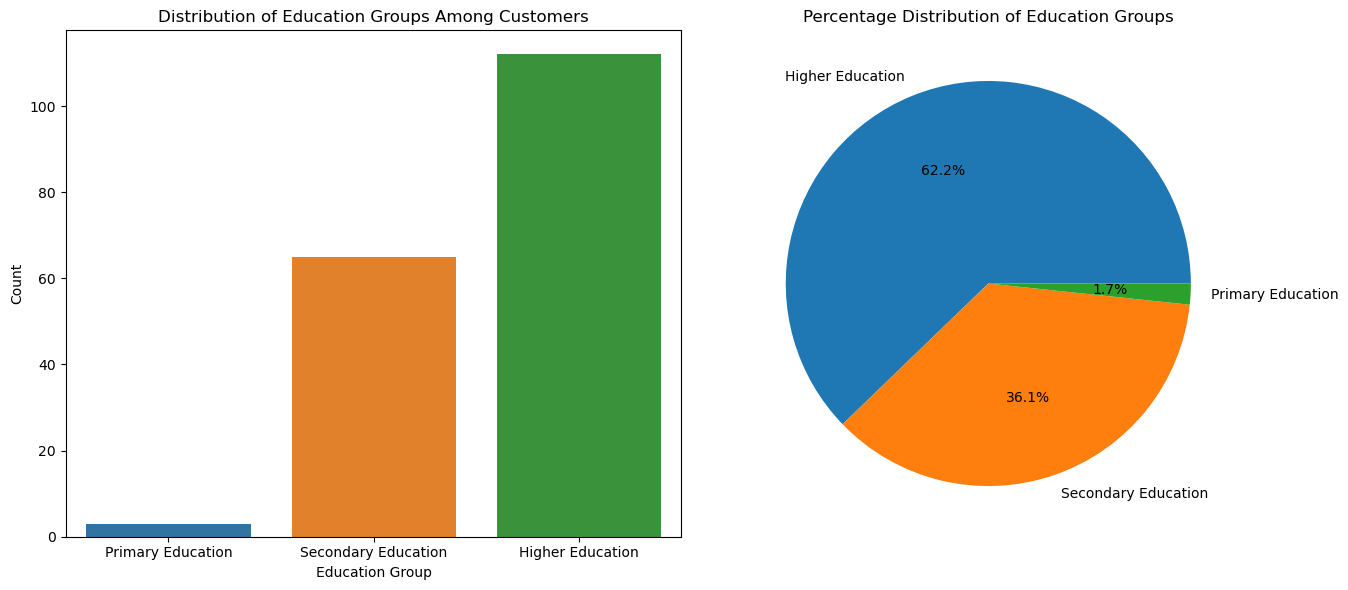

In [50]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for distribution of age groups
plt.subplot(1, 2, 1)
sns.countplot(x="Education_group", data=df)
plt.title("Distribution of Education Groups Among Customers")
plt.xlabel("Education Group")
plt.ylabel("Count")

# Subplot 2: Pie chart for percentage distribution of age groups
plt.subplot(1, 2, 2)
agegroup_counts = df["Education_group"].value_counts(normalize=True)
plt.pie(agegroup_counts, labels=agegroup_counts.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Education Groups")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the provided education level distribution among customers:

* Higher Education (16 years and above): 62.22% of the customers fall into this category.
* Secondary Education (13 to 15 years): 36.11% of the customers fall into this category.
* Primary Education (up to 12 years): 1.67% of the customers fall into this category.

Insights:

1. Higher Education (16 years and above):

* Popularity: The majority of customers have a higher education level, making up over 62% of the customer base.
* Target Audience: Likely to have higher disposable income and value advanced features and quality.
* Strategy: Marketing campaigns should highlight the advanced features, quality, and long-term benefits of the KP481 and KP781 models. These customers might appreciate detailed information on the technical specifications and unique features of the treadmills. Emphasizing the premium aspects and potential for enhancing their fitness routines could attract this segment.

2. Secondary Education (13 to 15 years):

* Popularity: A significant portion of the customers, over 36%, have secondary education.
* Target Audience: Likely to be middle-income earners looking for a balance between cost and features.
* Strategy: Focus on the KP281 and KP481 models, which offer good value for money. Marketing should emphasize practical features, ease of use, and affordability. Testimonials and success stories from similar customers can be effective. Highlighting promotions or financing options could also attract this demographic.

3. Primary Education (up to 12 years):

* Popularity: This is the smallest segment, making up only 1.67% of the customer base.
* Target Audience: Likely to be lower-income earners and may prioritize affordability.
* Strategy: Emphasize the cost-effectiveness and essential features of the KP281 model. Marketing should highlight the basic functionalities and health benefits of regular exercise. Community outreach programs and partnerships with local organizations could help in reaching this audience.

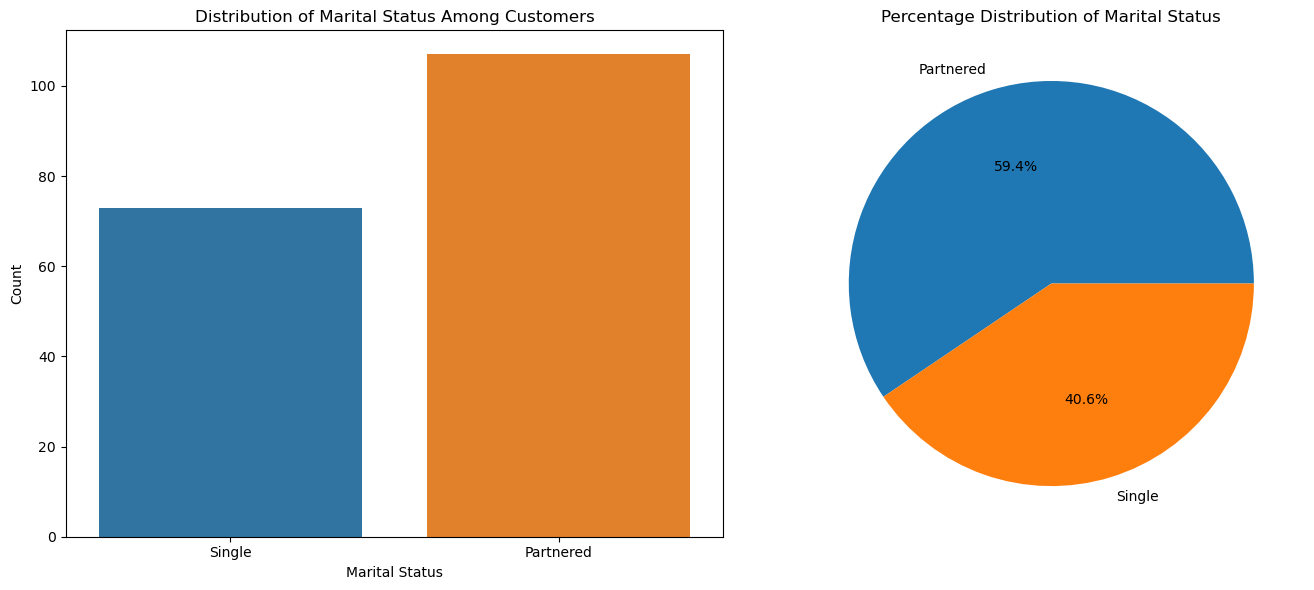

In [51]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for distribution of marital status
plt.subplot(1, 2, 1)
sns.countplot(x="MaritalStatus", data=df)
plt.title("Distribution of Marital Status Among Customers")
plt.xlabel("Marital Status")
plt.ylabel("Count")

# Subplot 2: Pie chart for percentage distribution of marital status
plt.subplot(1, 2, 2)
marital_counts = df["MaritalStatus"].value_counts(normalize=True)
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Marital Status")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the provided marital status distribution among customers:

1. Partnered: 59.44% of the customers are partnered.
2. Single: 40.56% of the customers are single.

Insights:
1. Partnered Customers:

* Popularity: The majority of customers, nearly 60%, are partnered.
* Target Audience: Likely to be in stable relationships with shared financial responsibilities and possibly higher disposable income.
* Strategy: Marketing campaigns could focus on the benefits of shared fitness goals and activities. Highlighting features that support family or partner workouts, such as multiple user profiles, durability, and safety, can appeal to partnered customers. Promoting the KP481 and KP781 models, which offer advanced features and robust construction, can be effective. Additionally, consider family or couple discounts and promotions.

2. Single Customers:

* Popularity: A significant portion, over 40%, are single.
* Target Audience: Likely to be more individualistic in their fitness routines and might prefer cost-effective solutions.
* Strategy: Emphasize the affordability and personal fitness tracking features of the KP281 and KP481 models. Highlighting the convenience, ease of use, and space-saving design can attract single customers. Marketing messages could focus on personal fitness achievements, solo workout benefits, and flexible financing options to appeal to this demographic.

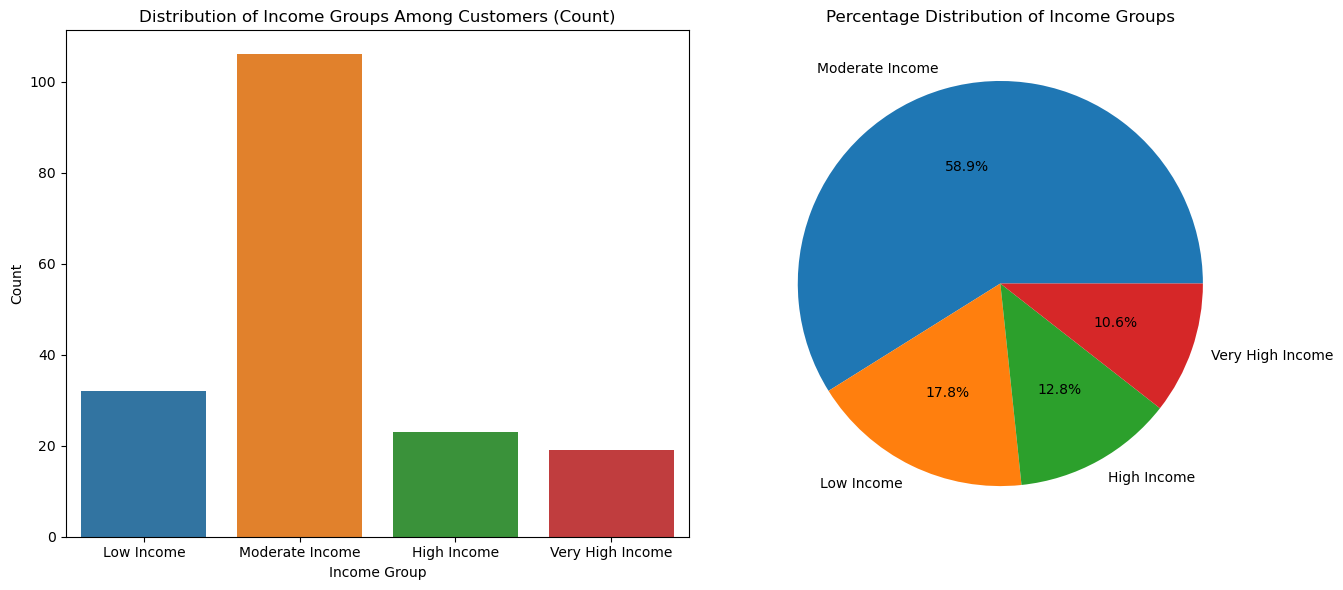

In [52]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for distribution of income groups
plt.subplot(1, 2, 1)
sns.countplot(x="Income_group", data=df)
plt.title("Distribution of Income Groups Among Customers (Count)")
plt.xlabel("Income Group")
plt.ylabel("Count")

# Subplot 2: Pie chart for percentage distribution of income groups
plt.subplot(1, 2, 2)
incomegroup_counts = df["Income_group"].value_counts(normalize=True)
plt.pie(incomegroup_counts, labels=incomegroup_counts.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Income Groups")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the provided income group distribution among customers:

1. Moderate Income (USD 40,000 to USD 60,000): 58.89% of the customers fall into this category.
2. Low Income (up to USD 40,000): 17.78% of the customers fall into this category.
3. High Income (USD 60,000 to USD 80,000): 12.78% of the customers fall into this category.
4. Very High Income (above USD 80,000): 10.56% of the customers fall into this category.
    
Insights:
1. Moderate Income (USD 40,000 to USD 60,000):

* Popularity: The majority of customers, nearly 59%, fall into this income group.
* Target Audience: Likely to be middle-income earners seeking a balance between cost and quality.
* Strategy: Focus marketing efforts on the KP281 and KP481 models, highlighting their cost-effectiveness and value for money. Emphasize features that offer good performance without being overly expensive. Promotions, financing options, and value bundles can be appealing to this demographic.

2. Low Income (up to USD 40,000):

* Popularity: A significant portion, 17.78%, are low-income earners.
* Target Audience: Likely to prioritize affordability and essential features.
* Strategy: Emphasize the affordability and essential features of the KP281 model. Marketing should highlight basic functionalities and the health benefits of regular exercise. Consider special discounts, community programs, and flexible payment plans to attract this group.

3.High Income (USD 60,000 to USD 80,000):

* Popularity: A smaller but notable segment, 12.78%, fall into this income group.
* Target Audience: Likely to seek high-quality, reliable fitness equipment with advanced features.
* Strategy: Highlight the advanced features and durability of the KP481 and KP781 models. Marketing campaigns could focus on the long-term benefits, superior performance, and advanced tracking metrics. Testimonials and endorsements from fitness experts can appeal to this segment.

4.Very High Income (above USD 80,000):

* Popularity: The smallest segment, 10.56%, fall into this income group.
* Target Audience: Likely to have the highest disposable income and seek premium products with advanced features.
* Strategy: Emphasize the premium aspects, cutting-edge technology, and luxury features of the KP781 model. Marketing should focus on exclusivity, superior quality, and the latest innovations. Personalized services, VIP programs, and premium customer support can attract this high-end segment.

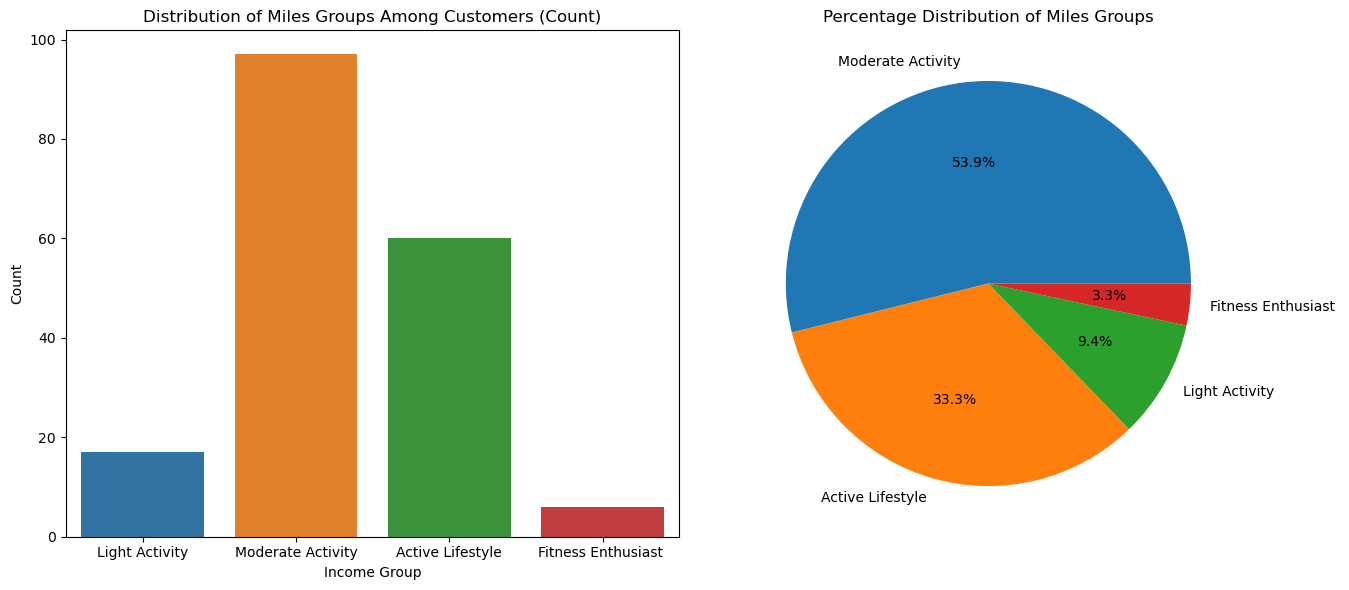

In [53]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for distribution of income groups
plt.subplot(1, 2, 1)
sns.countplot(x="Miles_group", data=df)
plt.title("Distribution of Miles Groups Among Customers (Count)")
plt.xlabel("Income Group")
plt.ylabel("Count")

# Subplot 2: Pie chart for percentage distribution of income groups
plt.subplot(1, 2, 2)
incomegroup_counts = df["Miles_group"].value_counts(normalize=True)
plt.pie(incomegroup_counts, labels=incomegroup_counts.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Miles Groups")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the provided categorization of the miles column:

1. Moderate Activity (51 to 100 miles): 53.89% of the customers fall into this category.
2. Active Lifestyle (101 to 200 miles): 33.33% of the customers fall into this category.
3.Light Activity (up to 50 miles): 9.44% of the customers fall into this category.
4. Fitness Enthusiast (above 200 miles): 3.33% of the customers fall into this category.

Insights:

1. Moderate Activity (51 to 100 miles):

* Popularity: The majority of customers, over 53%, fall into this category.
* Target Audience: Likely to be moderately active individuals who engage in regular, but not intense, physical activities.
* Strategy: Focus on the KP281 and KP481 models, which offer reliable performance for regular use. Marketing should highlight features that support consistent, moderate usage, such as comfortable cushioning, easy-to-use interfaces, and reliable performance tracking. Emphasize the value for money and the ability to maintain an active lifestyle without excessive cost.

2. Active Lifestyle (101 to 200 miles):

* Popularity: A significant portion, 33.33%, fall into this category.
* Target Audience: Likely to be individuals who engage in regular, intense physical activities.
* Strategy: Highlight the advanced features and durability of the KP481 and KP781 models. Marketing should emphasize the benefits of these models for supporting higher mileage and more intense workouts. Features like advanced tracking, higher speed settings, and robust build quality can be appealing. Success stories and testimonials from users with active lifestyles can be effective.

3. Light Activity (up to 50 miles):

* Popularity: A smaller segment, 9.44%, fall into this category.
* Target Audience: Likely to be individuals who engage in light, infrequent physical activities.
* Strategy: Emphasize the affordability and basic features of the KP281 model. Marketing should highlight the ease of use, compact design, and essential functionalities suitable for light use. Promotions that focus on the health benefits of even light activity and introductory offers can attract this group.

4. Fitness Enthusiast (above 200 miles):

* Popularity: The smallest segment, 3.33%, fall into this category.
* Target Audience: Likely to be highly active individuals who require equipment that can support extensive and intense usage.
* Strategy: Highlight the premium aspects and advanced features of the KP781 model. Marketing should focus on the exceptional durability, advanced tracking capabilities, and features that cater to intensive workouts. Personalized services, exclusive offers, and endorsements from fitness professionals can attract this high-intensity user group.

#### Numeric Columnns

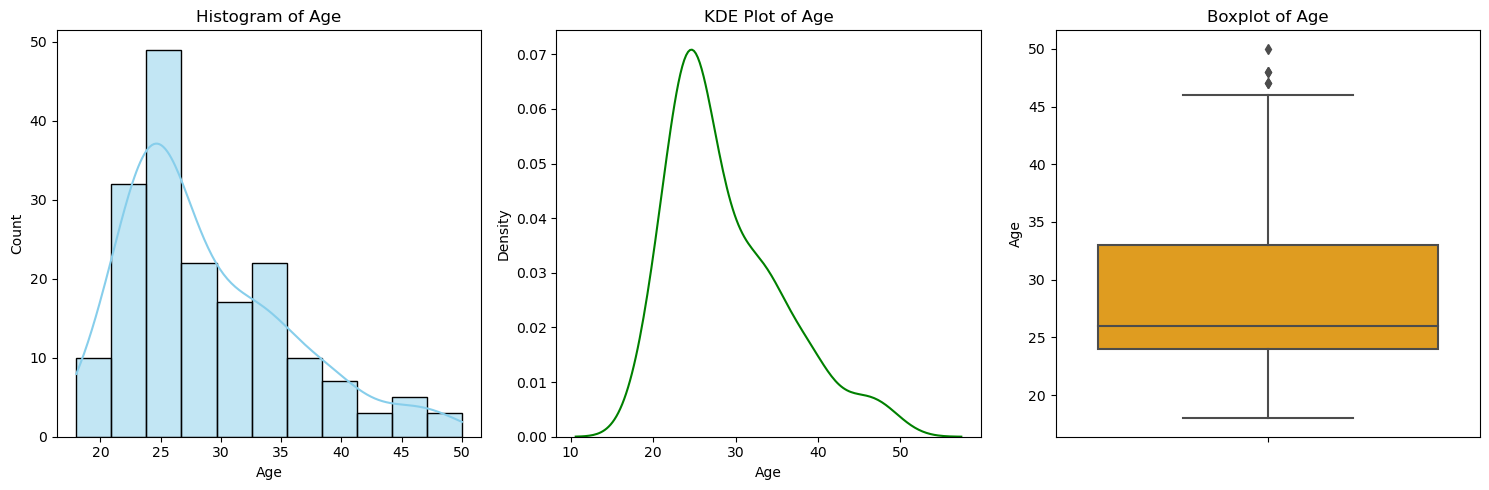

In [54]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for age
sns.histplot(df["Age"], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Histogram of Age")

# KDE plot for age
sns.kdeplot(df["Age"], ax=axes[1], color="green")
axes[1].set_title("KDE Plot of Age")

# Boxplot for age
sns.boxplot(y=df["Age"], ax=axes[2], color="orange")
axes[2].set_title("Boxplot of Age")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Insights:

The age distribution of Aerofit's customers is diverse, with the highest concentration around the mid-20s. Customers in their mid-20s make up the largest segment, followed by a gradual decline in numbers as age increases beyond the early 30s. The distribution suggests a varied customer base spanning from late teens to middle-aged individuals, with a notable presence of young adults.

### Outliers:
As we can see from the box plot, there are 3 outlier's present in the age data.

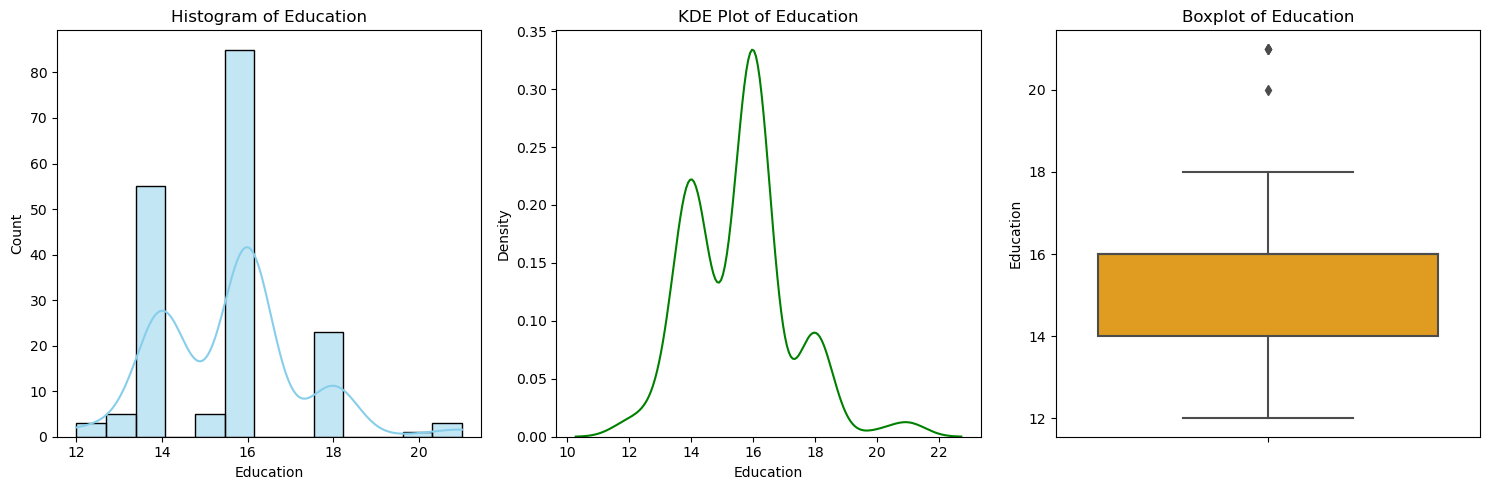

In [55]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for education
sns.histplot(df["Education"], ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Histogram of Education")

# KDE plot for education
sns.kdeplot(df["Education"], ax=axes[1], color="green")
axes[1].set_title("KDE Plot of Education")

# Boxplot for education
sns.boxplot(y=df["Education"], ax=axes[2], color="orange")
axes[2].set_title("Boxplot of Education")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:

* The majority of customers have completed 16 years of education, indicating a relatively well-educated customer base.
* There is also a significant presence of customers with 14 years of education.
* Fewer customers have completed 18 years of education, but this group still represents a notable portion of the customer base.
* Customers with 15, 13, and 12 years of education are relatively small segments.
* There are only a few customers with 21 and 20 years of education, indicating a small but present segment of highly educated individuals.

### Outliers:
* As we can see from the box plot, there are 2 outlier's present in the education data.

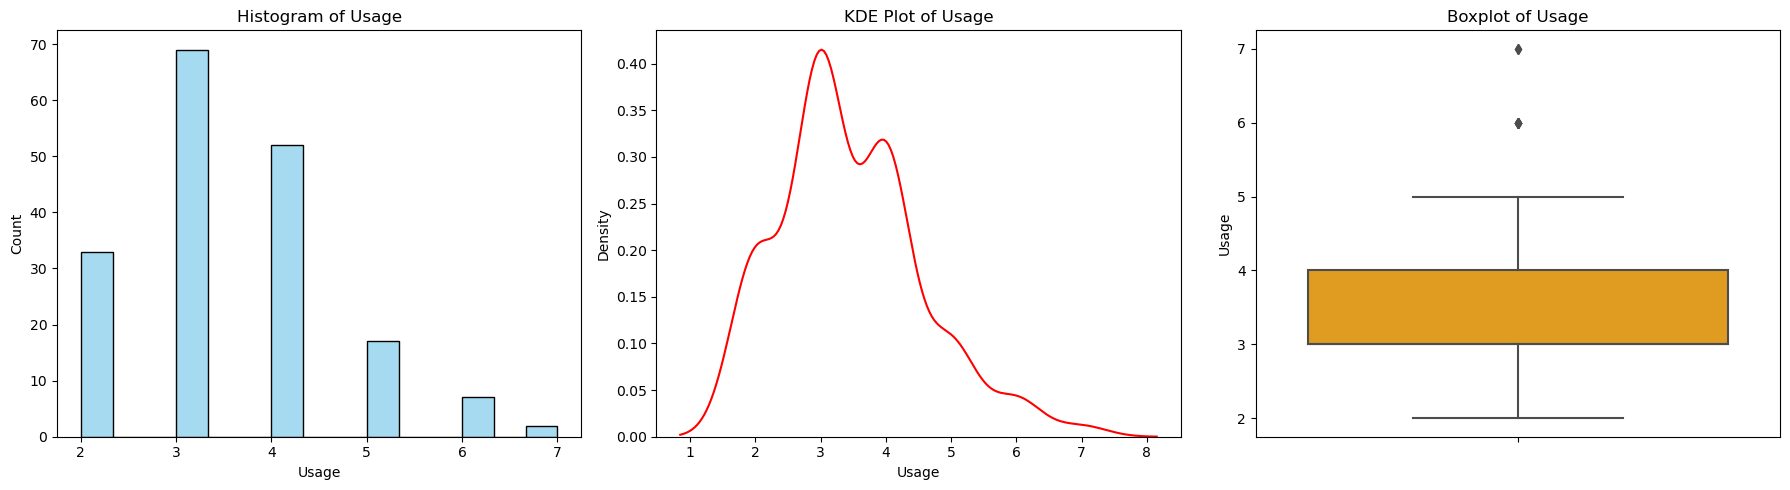

In [56]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Usage
sns.histplot(df["Usage"], ax=axes[0], color="skyblue")
axes[0].set_title("Histogram of Usage")

# KDE plot for Usage
sns.kdeplot(df["Usage"], ax=axes[1], color="red")
axes[1].set_title("KDE Plot of Usage")

# Boxplot for Usage
sns.boxplot(y=df["Usage"], ax=axes[2], color="orange")
axes[2].set_title("Boxplot of Usage")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:

* The majority of customers use treadmill 3 times a week, indicating a higher probability of them , purchasing a treadmill from Aerofit.

### Outliers:
* As we can see from the box plot, there are 2 outlier's present in the Usage data.

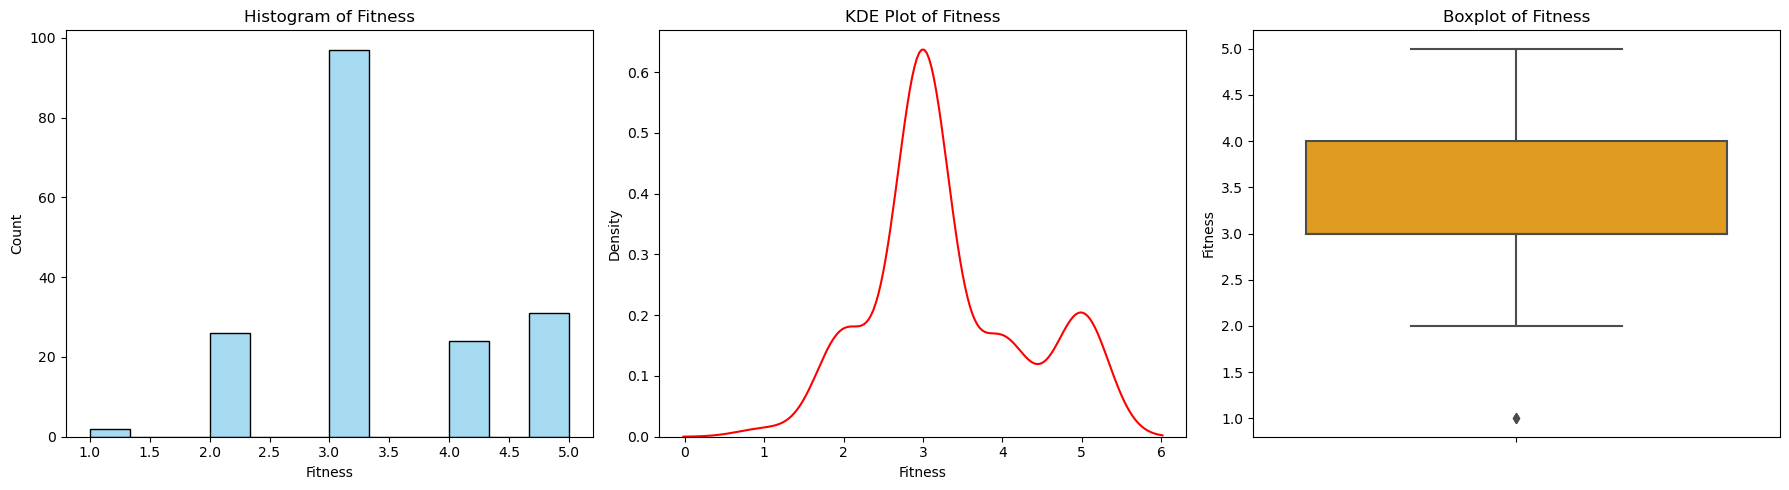

In [57]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Fitness
sns.histplot(df["Fitness"], ax=axes[0], color="skyblue")
axes[0].set_title("Histogram of Fitness")

# KDE plot for Fitness
sns.kdeplot(df["Fitness"], ax=axes[1], color="red")
axes[1].set_title("KDE Plot of Fitness")

# Boxplot for Fitness
sns.boxplot(y=df["Fitness"], ax=axes[2], color="orange")
axes[2].set_title("Boxplot of Fitness")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:

* The majority of customers possess fitness level of 3, indicating a higher probability of them , purchasing a treadmill from Aerofit.

### Outliers:
* As we can see from the box plot, there is 1 outlier present in the Fitness data.

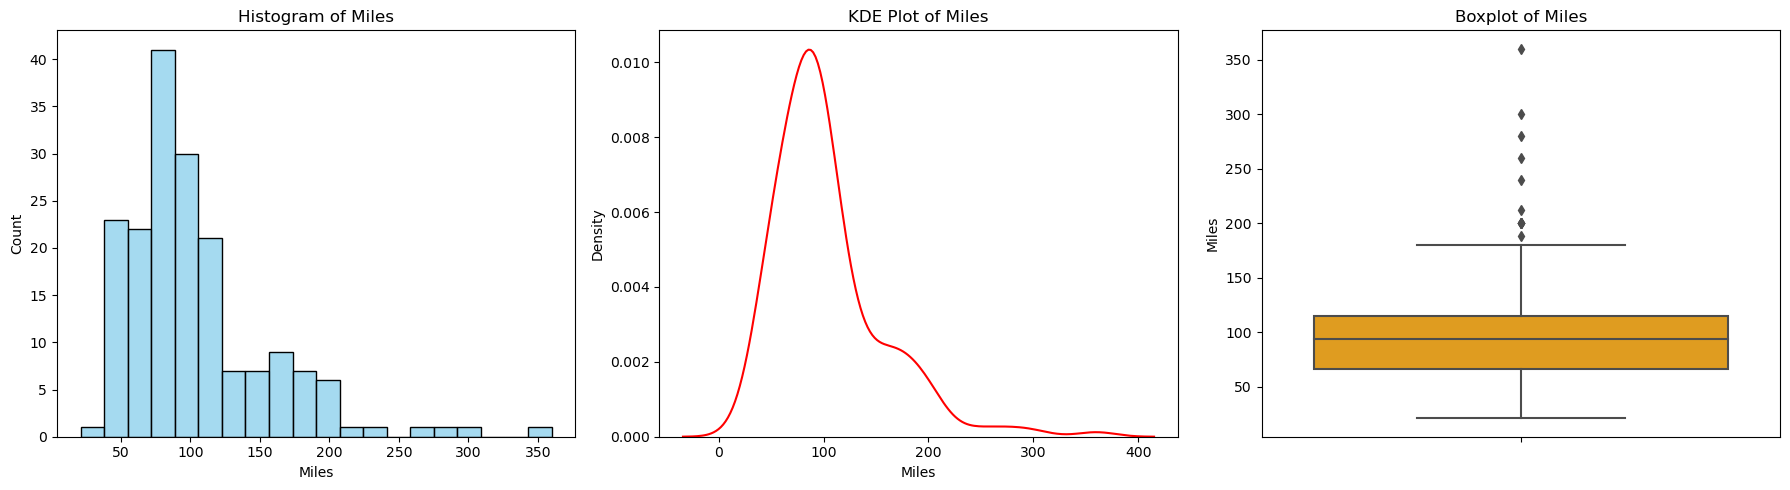

In [58]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Miles
sns.histplot(df["Miles"], ax=axes[0], color="skyblue")
axes[0].set_title("Histogram of Miles")

# KDE plot for Miles
sns.kdeplot(df["Miles"], ax=axes[1], color="red")
axes[1].set_title("KDE Plot of Miles")

# Boxplot for Miles
sns.boxplot(y=df["Miles"], ax=axes[2], color="orange")
axes[2].set_title("Boxplot of Miles")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:

* Customers who run 90-100 miles per week show a perference for Aerofit tredmill, indicating a higher probability of them , purchasing a treadmill from Aerofit.

### Outliers:
* As we can see from the box plot, there are many ouliers present in the Miles data.

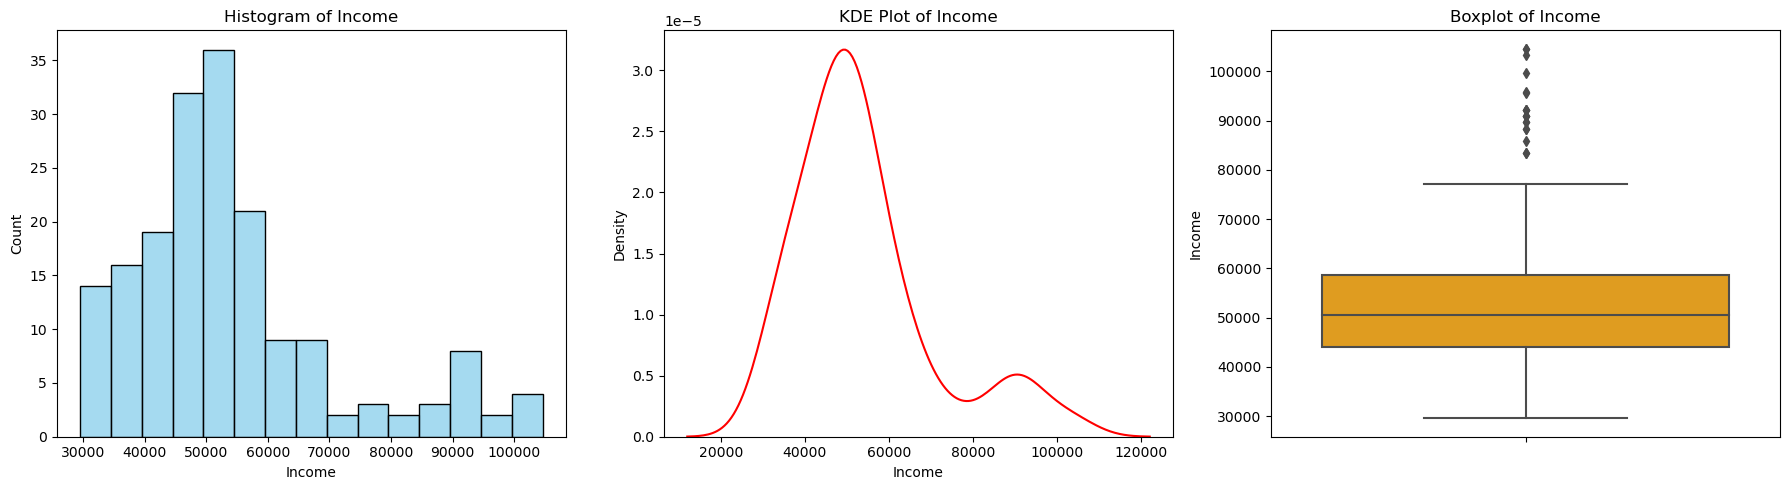

In [59]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Income
sns.histplot(df["Income"], ax=axes[0], color="skyblue")
axes[0].set_title("Histogram of Income")

# KDE plot for Income
sns.kdeplot(df["Income"], ax=axes[1], color="red")
axes[1].set_title("KDE Plot of Income")

# Boxplot for Income
sns.boxplot(y=df["Income"], ax=axes[2], color="orange")
axes[2].set_title("Boxplot of Income")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights:

* The majority of customers fall within the income range of 40000-60000, indicating a higher probability of them , purchasing a treadmill from Aerofit.

### Outliers:
* As we can see from the box plot, there are many ouliers present in the Income data.

### Bivariate Analysis

### Marital Status vs. Product Purchased:

In [60]:
# Group by Product and MaritalStatus, then count the occurrences
marital_counts = df.groupby(["Product", "MaritalStatus"]).size().unstack(fill_value=0)
marital_counts

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


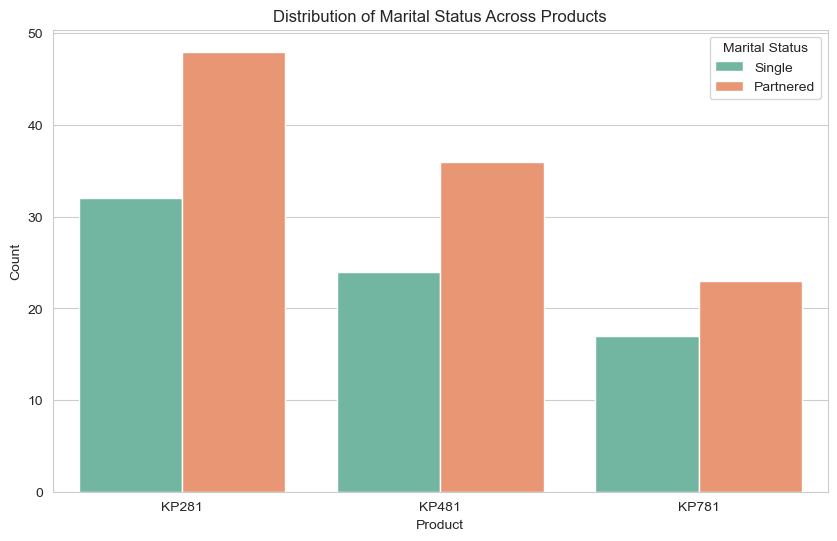

In [61]:
# Set the style
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", hue="MaritalStatus", data=df, palette="Set2")
plt.title("Distribution of Marital Status Across Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.show()

#### Gender vs. Product Purchased:

In [62]:
# Group by Product and Gender, then count the occurrences
gender_counts = df.groupby(["Product", "Gender"]).size().unstack(fill_value=0)
gender_counts

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


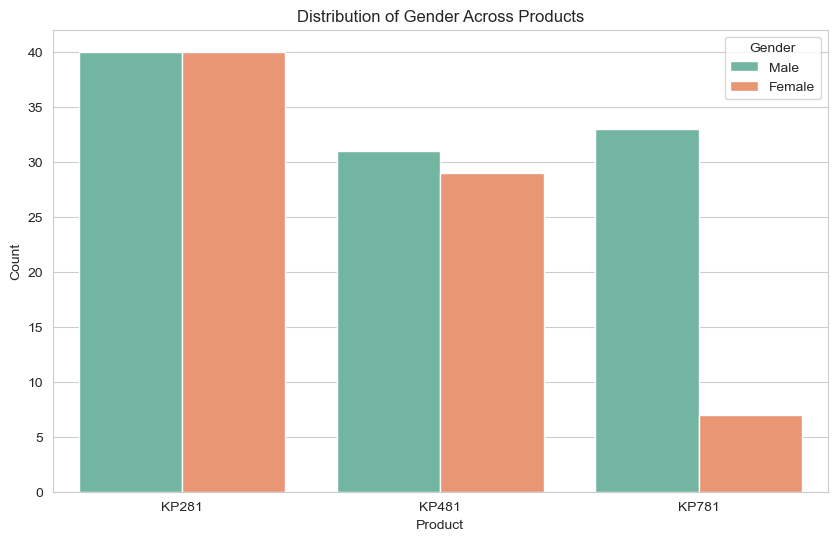

In [63]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", hue="Gender", data=df, palette="Set2")
plt.title("Distribution of Gender Across Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

#### 🔍 Insights
1. Gender

* Treadmill model KP781 is preferred more by male customers.

* Both treadmill models, KP481 and KP281, show equal distribution of both the gender

2. Marital Status

* For all the three treadmill models, there is uniform distribution of Married and Single customers with married customers showing slighly higher preference.

In [64]:
# Group by Product and Age_group, then count the occurrences
age_group_counts = df.groupby(["Product", "Age_group"]).size().unstack(fill_value=0)
age_group_counts

Age_group,Young Adults,Adults,Middle Aged Adults,Elder
Product,,,,
KP281,34,32,11,3
KP481,28,24,7,1
KP781,17,17,4,2


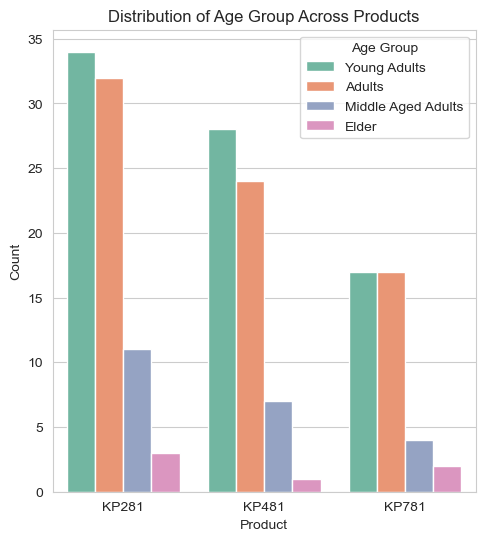

In [65]:
# Create the count plot for Age group
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="Product", hue="Age_group", data=df, palette="Set2")
plt.title("Distribution of Age Group Across Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(title="Age Group")

#### 🔍 Insights
* The analysis provided above distinctly demonstrates that there exists no strong correlation between age groups and product preferences. This is evident from the nearly uniform distribution of age groups across all the products.

In [66]:
# Group by Product and Income_group, then count the occurrences
income_group_counts = df.groupby(["Product", "Income_group"]).size().unstack(fill_value=0)
income_group_counts

Income_group,Low Income,Moderate Income,High Income,Very High Income
Product,,,,
KP281,23,51,6,0
KP481,9,44,7,0
KP781,0,11,10,19


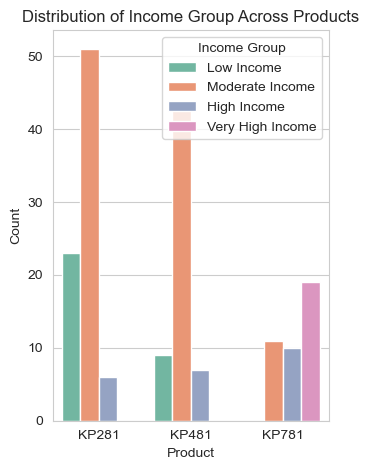

In [67]:
# Create the count plot for Income group
plt.subplot(1, 2, 2)
sns.countplot(x="Product", hue="Income_group", data=df, palette="Set2")
plt.title("Distribution of Income Group Across Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(title="Income Group")

plt.tight_layout()
plt.show()

#### 🔍 Insights

* Treadmill model KP781 is preferred more by customers with Very High Income

* Both treadmill models, KP481 and KP281, are preferred more by customers with Moderate Income

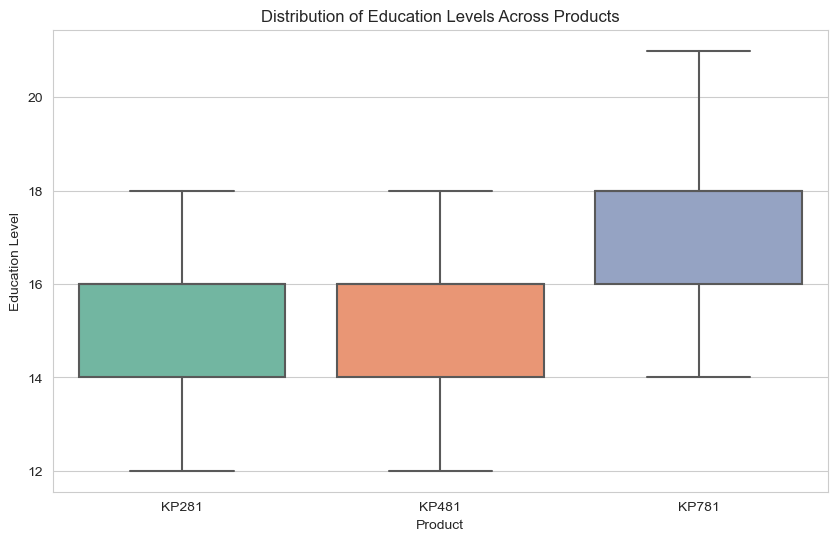

In [68]:
# Create the box plot for Education vs Product
plt.figure(figsize=(10, 6))
sns.boxplot(x="Product", y="Education", data=df, palette="Set2")
plt.title("Distribution of Education Levels Across Products")
plt.xlabel("Product")
plt.ylabel("Education Level")
plt.show()

#### 🔍 Insights

* The analysis provided above cleary demonstrates the preference of Highly Educated people for treadmill model KP781

* For treadmill models KP481 and KP281, the distribution of customer with Secondary Education and with Higher Education is almost equal

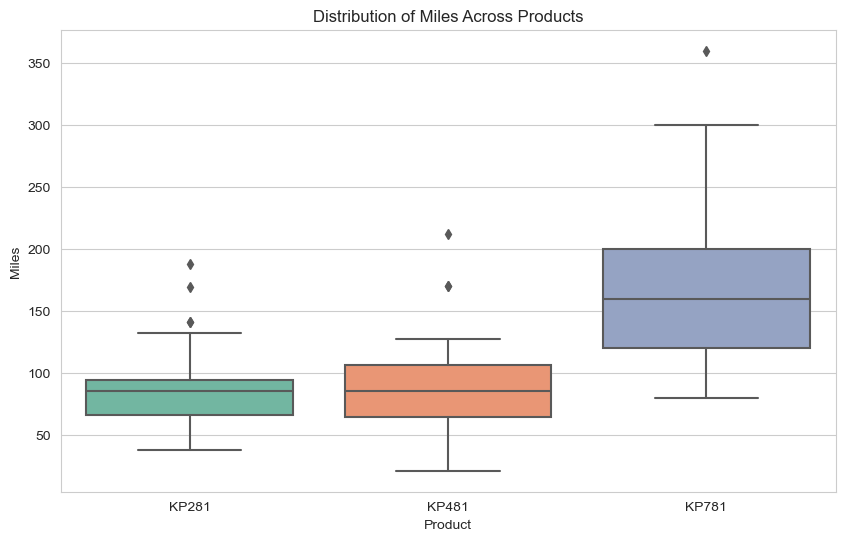

In [69]:
# Set the style
sns.set_style("whitegrid")

# Create the box plot for Miles vs Product
plt.figure(figsize=(10, 6))
sns.boxplot(x="Product", y="Miles", data=df, palette="Set2")
plt.title("Distribution of Miles Across Products")
plt.xlabel("Product")
plt.ylabel("Miles")
plt.show()

### 🔍 Insights

* Treadmill model KP781 is preferred more by customers planning to run 100 to 200 miles per week

* Both treadmill models, KP481 and KP281, are preferred more by customers planning to run 50 to 100 miles per week

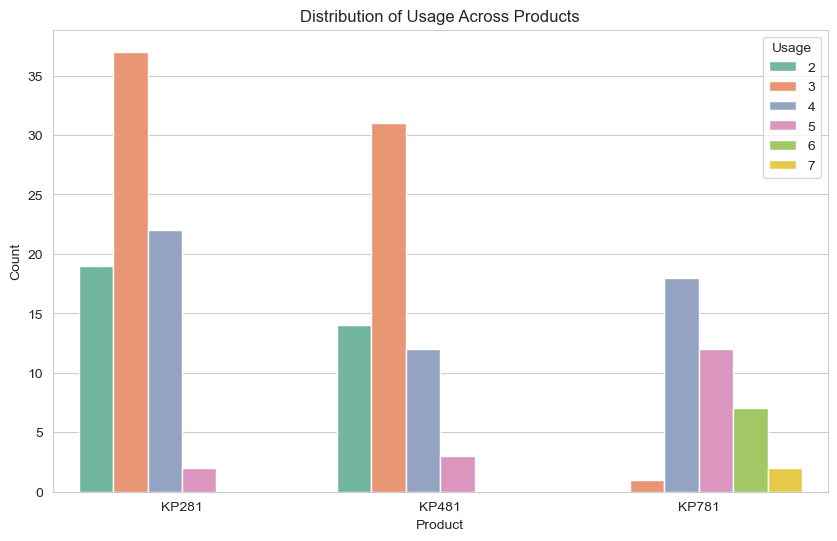

In [70]:
# Create the count plot for Usage vs Product
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", hue="Usage", data=df, palette="Set2")
plt.title("Distribution of Usage Across Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(title="Usage")
plt.show()

#### Insights:
* Customers who use treadmills 3 times per week prefer KP281 Aand KP481.However, the customers who use treadmills 4-5 times a week prefer KP781.

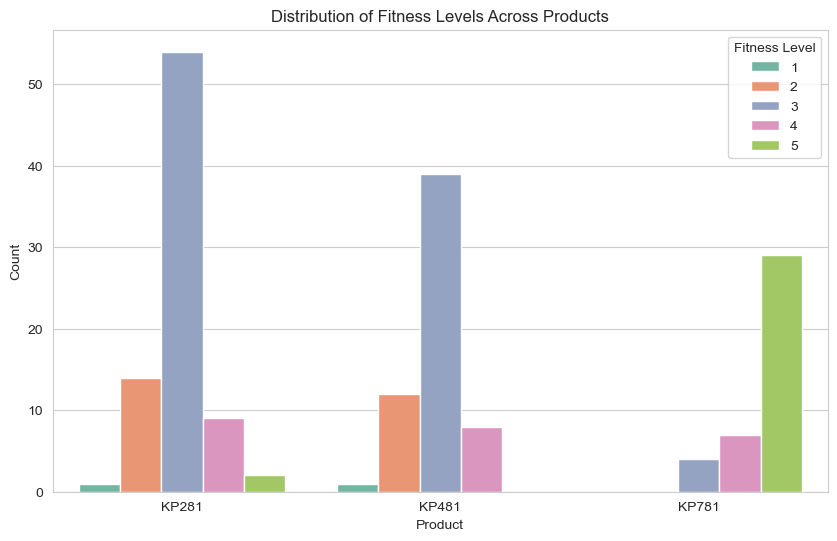

In [71]:
# Create the count plot for Fitness vs Product
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", hue="Fitness", data=df, palette="Set2")
plt.title("Distribution of Fitness Levels Across Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.legend(title="Fitness Level")
plt.show()

#### Insights:
* Customers with fitness level 3 prefer both KP281 AND KP481,while customers with fitness level 5 predominately use the most advanced KP781 tredmill.

# Check the correlation among different factors

In [72]:
# Compute the correlation matrix
correlation_matrix = df.corr()

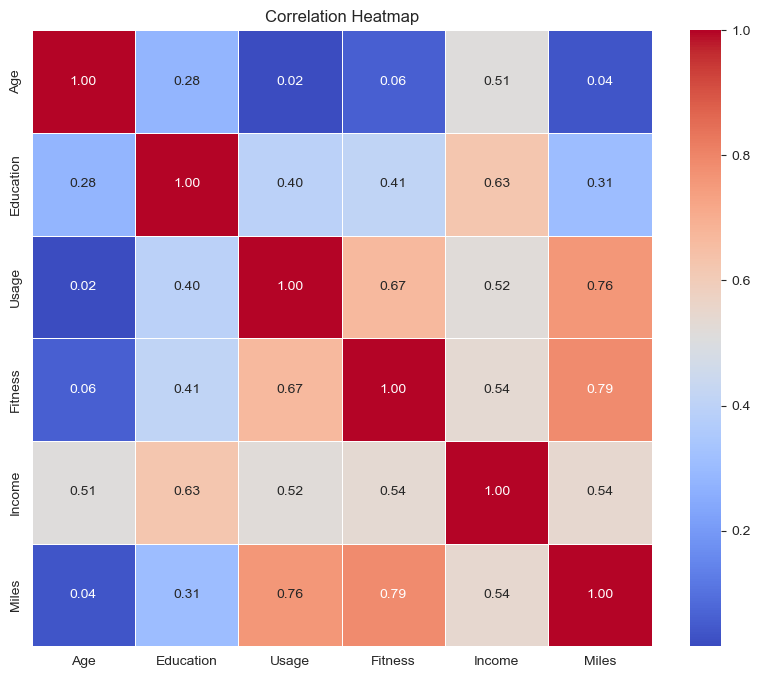

In [73]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Insights:
    

* The pair plot illustrates a clear positive correlation between Age and Income, which is further supported by the heatmap, indicating a strong relationship between these two variables.

* Additionally, Education demonstrates a substantial correlation with Income, as expected. Moreover, Education shows significant correlations with both Fitness rating and Treadmill usage.

* Furthermore, there is a pronounced correlation between Treadmill usage and both Fitness level and Miles covered. This suggests that greater usage of the treadmill correlates with higher levels of fitness and greater distances covered.

### Computing Probability - Marginal, Conditional Probability

### Probability of product purchased w.r.t. gender

In [74]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


#### 🔍 Insights

1. The Probability of a treadmill being purchased by a female is 42%.

The conditional probability of purchasing the treadmill model given that the customer is female is:

* For Treadmill model KP281 - 22%

* For Treadmill model KP481 - 16%

* For Treadmill model KP781 - 4%

2. The Probability of a treadmill being purchased by a male is 58%.

The conditional probability of purchasing the treadmill model given that the customer is male is -

* For Treadmill model KP281 - 22%

* For Treadmill model KP481 - 17%

* For Treadmill model KP781 - 18%

### Probability of product purchase w.r.t. Age

In [75]:
pd.crosstab(index =df['Product'],columns = df['Age_group'],margins = True,normalize = True ).round(2)

Age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


1. The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

The conditional probability of purchasing the treadmill model given that the customer is Young Adult is:

* For Treadmill model KP281 - 19%

* For Treadmill model KP481 - 16%

* For Treadmill model KP781 - 9%

2. The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

The conditional probability of purchasing the treadmill model given that the customer is Adult is -

* For Treadmill model KP281 - 18%

* For Treadmill model KP481 - 13%

* For Treadmill model KP781 - 9%

3. The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.

* For Treadmill model KP281 - 6%

* For Treadmill model KP481 - 4%

* For Treadmill model KP781 - 2%

4. The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

### Probability of product purchase w.r.t. Education level

In [76]:
pd.crosstab(index =df['Product'],columns = df['Education_group'],margins = True,normalize = True ).round(2)

Education_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


#### 🔍 Insights

The Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62%.

1. The conditional probability of purchasing the treadmill model given that the customer has Higher Education is

* For Treadmill model KP281 - 23%

* For Treadmill model KP481 - 18%

* For Treadmill model KP781 - 21%

2. The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36%.

The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -

* For Treadmill model KP281 - 21%

* For Treadmill model KP481 - 14%

* For Treadmill model KP781 - 1%

3. The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%.

### Probability of product purchase w.r.t. Income

In [77]:
pd.crosstab(index =df['Product'],columns = df['Income_group'],margins = True,normalize = True ).round(2)

Income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


🔍 Insights

1. The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

The conditional probability of purchasing the treadmill model given that the customer has Low Income is -

* For Treadmill model KP281 - 13%

* For Treadmill model KP481 - 5%

* For Treadmill model KP781 - 0%


2. The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -

* For Treadmill model KP281 - 28%

* For Treadmill model KP481 - 24%

* For Treadmill model KP781 - 6%


3. The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

* For Treadmill model KP281 - 3%

* For Treadmill model KP481 - 4%

* For Treadmill model KP781 - 6%


4. The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

The conditional probability of purchasing the treadmill model given that the customer has High Income is -

* For Treadmill model KP281 - 0%

* For Treadmill model KP481 - 0%

* For Treadmill model KP781 - 11%

### Probability of product purchase w.r.t. Marital Status

In [78]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


#### 🔍 Insights

1. The Probability of a treadmill being purchased by a Married Customer is 59%.

The conditional probability of purchasing the treadmill model given that the customer is Married is

* For Treadmill model KP281 - 27%

* For Treadmill model KP481 - 20%

* For Treadmill model KP781 - 13%

2. The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

* For Treadmill model KP281 - 18%

* For Treadmill model KP481 - 13%

* For Treadmill model KP781 - 9%

#### Probability of product purchase w.r.t. Weekly Usage

In [79]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


🔍 Insights

1. The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -

* For Treadmill model KP281 - 21%

* For Treadmill model KP481 - 17%

* For Treadmill model KP781 - 1%


2. The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -

* For Treadmill model KP281 - 12%

* For Treadmill model KP481 - 7%

* For Treadmill model KP781 - 10%


3. The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -

* For Treadmill model KP281 - 11%

* For Treadmill model KP481 - 8%

* For Treadmill model KP781 - 0%

### Probability of product purchase w.r.t. Customer Fitness

In [80]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


#### 🔍 Insights
1. The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -

* For Treadmill model KP281 - 30%

* For Treadmill model KP481 - 22%

* For Treadmill model KP781 - 2%

2. The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.

3. The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

### Probability of product purchase w.r.t. weekly mileage

In [81]:
pd.crosstab(index =df['Product'],columns = df['Miles_group'],margins = True,normalize = True ).round(2)

Miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


#### 🔍 Insights

1. The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -

* For Treadmill model KP281 - 7%

* For Treadmill model KP481 - 3%

* For Treadmill model KP781 - 0%

2. The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -

* For Treadmill model KP281 - 28%

* For Treadmill model KP481 - 22%

* For Treadmill model KP781 - 4%

3. The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -

* For Treadmill model KP281 - 10%

* For Treadmill model KP481 - 8%

* For Treadmill model KP781 - 15%

4.The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only.

#### Customer Profiling

Based on above analysis

* Probability of purchase of KP281 = 44%

* Probability of purchase of KP481 = 33%

* Probability of purchase of KP781 = 22%

1. Customer Profile for KP281 Treadmill:

* Age of customer mainly between 18 to 35 years with few between 35 to 50 years
* Education level of customer 13 years and above
* Annual Income of customer below USD 60,000
* Weekly Usage - 2 to 4 times
* Fitness Scale - 2 to 4
* Weekly Running Mileage - 50 to 100 miles

2. Customer Profile for KP481 Treadmill:

* Age of customer mainly between 18 to 35 years with few between 35 to 50 years
* Education level of customer 13 years and above
* Annual Income of customer between USD 40,000 to USD 80,000
* Weekly Usage - 2 to 4 times
* Fitness Scale - 2 to 4
* Weekly Running Mileage - 50 to 200 miles

3. Customer Profile for KP781 Treadmill:

* Gender - Male
* Age of customer between 18 to 35 years
* Education level of customer 15 years and above
* Annual Income of customer USD 80,000 and above
* Weekly Usage - 4 to 7 times
* Fitness Scale - 3 to 5
* Weekly Running Mileage - 100 miles and above

#### Recommendations

1. Targeted Marketing Campaigns for KP781: The KP784 model shows a notable discrepancy in sales between genders, with only 18% of total sales coming from female customers. To address this, consider implementing tailored marketing strategies, such as exclusive promotions and trial offers, specifically designed to attract female customers.

2. Competitive Pricing and Flexible Payment Options: Considering the demographics of the target audience, it's advisable to price the KP281 and KP481 Treadmill models competitively. Additionally, offering flexible payment plans that allow customers to spread the cost over several months can improve accessibility for individuals with varying budget constraints.

3. Seamless Integration with User-Friendly App: Develop a user-friendly mobile application that seamlessly syncs with the treadmill. This app should track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized workout recommendations based on their fitness level and objectives. Enhancing the treadmill experience with such features can increase user engagement and satisfaction.